### Analyysejä analysointiosaamisen tehtävään 2

In [1]:
# Kirjastojen tuonti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Kaavioiden tyylimäärittely
plt.style.use('seaborn-whitegrid')

# Datan avaaminen
df=pd.read_excel('http://myy.haaga-helia.fi/~taaak/a/t2aineisto.xlsx')
df.head()

,Nro,Rahaston nimi,5 vuoden tuotto (% vuodessa),3 vuoden tuotto (% vuodessa),1 vuoden tuotto,6 kuukauden tuotto,Hallinn. ja säilytyspalkkio (% vuodessa),Rahastoluokka
0,0,Aktia Capital,0.068614,0.049454,-0.023369,0.055161,0.0183,EQ_FINLAND
1,1,Danske Invest Suomen Parhaat K,0.073917,0.049520,-0.041219,0.001481,0.0150,EQ_FINLAND
2,2,Danske Invest Suomen Pienyhtiöt K,0.083878,0.052164,-0.029582,0.087820,0.0130,EQ_FINLAND
3,3,Danske Invest Suomi Osake,0.067301,0.054706,-0.046504,0.028249,0.0190,EQ_FINLAND
4,4,Danske Invest Suomi Osinko Plus K,0.082861,0.074205,-0.065948,0.002309,0.0150,EQ_FINLAND


In [2]:
# Lyhyemmät nimet muuttujille
df.columns=['nro', 'nimi', 'tuotto 5v', 'tuotto 3v', 'tuotto 1v', 'tuotto 6kk', 'palkkio', 'rahastoluokka']

In [3]:
#Tilastolliset tunnusluvut rahastoluokittain
df.drop('nro', axis=1).groupby('rahastoluokka').describe().T

rahastoluokka     EQ_EMER_GLOBAL   EQ_EUROPE  EQ_FINLAND   EQ_NORAM
tuotto 5v  count       54.000000   99.000000   35.000000  59.000000
           mean         0.050321    0.059431    0.083936   0.124061
           std          0.019579    0.024113    0.019245   0.036321
           min          0.013379    0.012114    0.052036   0.021526
           25%          0.037955    0.043670    0.070707   0.105189
           50%          0.049853    0.053649    0.081450   0.127536
           75%          0.068355    0.072128    0.090515   0.140868
           max          0.088579    0.136334    0.144963   0.215002
tuotto 3v  count       60.000000  116.000000   35.000000  61.000000
           mean         0.065246    0.063080    0.066481   0.111858
           std          0.033474    0.025258    0.019537   0.041211
           min         -0.001416    0.000268    0.024694   0.016681
           25%          0.037240    0.044020    0.049855   0.085264
           50%          0.063975    0.066392    0.068571   0.111511
           75%          0.085109    0.076330    0.083021   0.134516
           max          0.161082    0.134010    0.104501   0.209429
tuotto 1v  count       69.000000  132.000000   45.000000  72.000000
           mean         0.050717   -0.016233   -0.023327   0.101775
           std          0.053464    0.055581    0.040693   0.065524
           min         -0.064842   -0.190671   -0.092637  -0.143285
           25%          0.024701   -0.052797   -0.041921   0.076456
           50%          0.052977   -0.008090   -0.027831   0.109760
           75%          0.075644    0.014223   -0.014397   0.134582
           max          0.234533    0.157397    0.086818   0.244189
tuotto 6kk count       72.000000  137.000000   45.000000  74.000000
           mean         0.067378    0.088385    0.046186   0.139767
           std          0.039127    0.047197    0.032296   0.045372
           min         -0.056049   -0.020918   -0.003631  -0.011460
           25%          0.050962    0.058114    0.028409   0.117298
           50%          0.065901    0.089834    0.037841   0.143867
           75%          0.087723    0.112759    0.055070   0.165562
           max          0.183478    0.250450    0.161246   0.252861
palkkio    count       72.000000  141.000000   45.000000  74.000000
           mean         0.015214    0.012126    0.012755   0.012659
           std          0.005991    0.005438    0.005957   0.005746
           min          0.002000    0.000000    0.001590   0.000000
           25%          0.010000    0.008000    0.007800   0.007625
           50%          0.016000    0.012000    0.015000   0.015000
           75%          0.019000    0.017500    0.018000   0.018000
           max          0.025000    0.020000    0.020000   0.022000

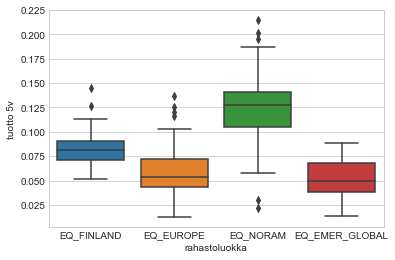

In [4]:
sns.boxplot(x='rahastoluokka', y='tuotto 5v', data=df)

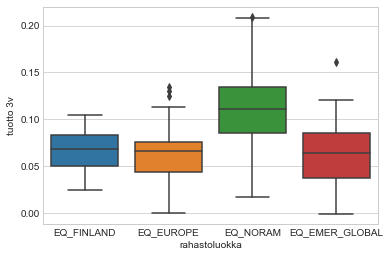

In [5]:
sns.boxplot(x='rahastoluokka', y='tuotto 3v', data=df)

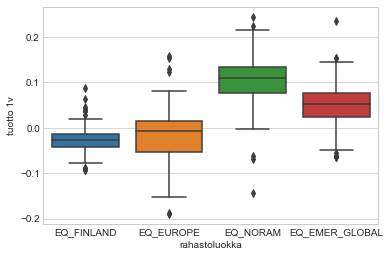

In [6]:
sns.boxplot(x='rahastoluokka', y='tuotto 1v', data=df)

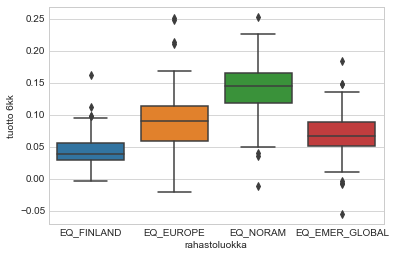

In [7]:
sns.boxplot(x='rahastoluokka', y='tuotto 6kk', data=df)

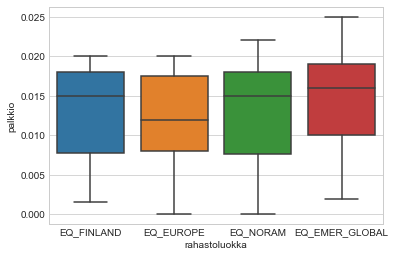

In [8]:
sns.boxplot(x='rahastoluokka', y='palkkio', data=df)

In [9]:
# pearsonr-funktion tuonti scipy.stats-kirjastosta
from scipy.stats import pearsonr

# Korrelaatiokertoimet ja p-arvot 1v tuoton ja palkkion välille rahastoluokittain
for luokka in pd.unique(df['rahastoluokka']):
    df_dropna = df[df['rahastoluokka']==luokka].dropna(subset=['tuotto 1v', 'palkkio'])
    corr, p = pearsonr(df_dropna['tuotto 1v'], df_dropna['palkkio'])
    print(luokka, 'korrelaatio %.3f,' %corr, 'p-arvo %.3f' %p)

EQ_FINLAND korrelaatio -0.100, p-arvo 0.515
EQ_EUROPE korrelaatio -0.232, p-arvo 0.008
EQ_NORAM korrelaatio -0.271, p-arvo 0.021
EQ_EMER_GLOBAL korrelaatio 0.154, p-arvo 0.205


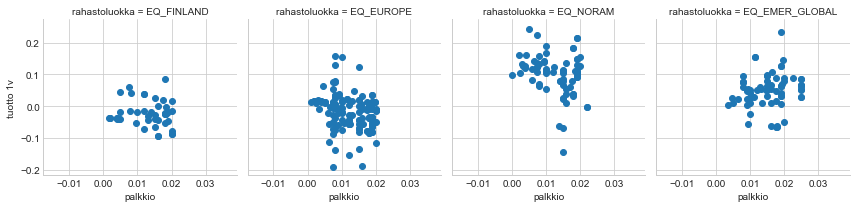

In [10]:
# 1v tuotot ja palkkiot pistekaavioina rahastoluokittain
g = sns.FacetGrid(data=df, col='rahastoluokka')
g = g.map(plt.scatter, 'palkkio', 'tuotto 1v')